In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
data = pd.read_csv(url, error_bad_lines=False)

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.info() #누락된 값 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [0]:
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [0]:
class OneHotEncoder(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_list):
        self.attribute_list=attribute_list
        self.one_hot_list=[]
    def fit(self,X):
        for attribute in self.attribute_list:
            one_hot_data=pd.get_dummies(X[attribute],prefix=attribute)
            self.one_hot_list.append(one_hot_data)
        return self
    def transform(self,X):
        new_X=X.drop(self.attribute_list,axis=1)
        new_X=pd.concat([new_X]+self.one_hot_list,axis=1)
        
        return new_X # pandas Dataframe으로 반환

In [0]:
preprocessing_pipeline=Pipeline([
    ('one_hot_encoder',OneHotEncoder(["sex","smoker","region"])),
    ('scaler',MinMaxScaler())
])

In [9]:
preprocessed_data=preprocessing_pipeline.fit_transform(data)
pd.DataFrame(preprocessed_data).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.021739,0.321227,0.0,0.251611,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.000000,0.479150,0.2,0.009636,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.217391,0.458434,0.6,0.053115,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.326087,0.181464,0.0,0.333010,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.304348,0.347592,0.0,0.043816,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [0]:
X=np.delete(preprocessed_data,[3], axis=1)
Y=preprocessed_data[:,3]

In [11]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.021739,0.321227,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.000000,0.479150,0.2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.217391,0.458434,0.6,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.326087,0.181464,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.304348,0.347592,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [12]:
pd.DataFrame(Y).head()

,0
0,0.251611
1,0.009636
2,0.053115
3,0.333010
4,0.043816


In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [14]:
print(X_train.shape)
print(Y_train.shape)

(1204, 11)
(1204,)


## 여기부터 tf 사용

In [15]:
model=tf.keras.Sequential([
                           tf.keras.layers.Dense(units=52,activation='relu',input_shape=(11,)),
                           tf.keras.layers.Dense(units=39,activation='relu'),
                           tf.keras.layers.Dense(units=26,activation='relu'),
                           tf.keras.layers.Dense(units=1)
])
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07),loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 52)                624       
_________________________________________________________________
dense_1 (Dense)              (None, 39)                2067      
_________________________________________________________________
dense_2 (Dense)              (None, 26)                1040      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 27        
Total params: 3,758
Trainable params: 3,758
Non-trainable params: 0
_________________________________________________________________


In [16]:
history=model.fit(X_train,Y_train,epochs=25,batch_size=100,validation_split=0.25)

Train on 903 samples, validate on 301 samples
Epoch 1/25
903/903 [==============================] - 1s 746us/sample - loss: 2.8278 - val_loss: 0.0300
Epoch 2/25
903/903 [==============================] - 0s 39us/sample - loss: 0.0192 - val_loss: 0.0268
Epoch 3/25
903/903 [==============================] - 0s 52us/sample - loss: 0.0231 - val_loss: 0.0256
Epoch 4/25
903/903 [==============================] - 0s 47us/sample - loss: 0.0170 - val_loss: 0.0129
Epoch 5/25
903/903 [==============================] - 0s 40us/sample - loss: 0.0112 - val_loss: 0.0108
Epoch 6/25
903/903 [==============================] - 0s 43us/sample - loss: 0.0103 - val_loss: 0.0102
Epoch 7/25
903/903 [==============================] - 0s 47us/sample - loss: 0.0097 - val_loss: 0.0097
Epoch 8/25
903/903 [==============================] - 0s 43us/sample - loss: 0.0092 - val_loss: 0.0115
Epoch 9/25
903/903 [==============================] - 0s 36us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 10/25
903/903 [=====

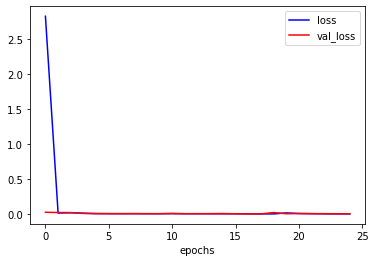

In [17]:
plt.plot(history.history['loss'],'b',label='loss')
plt.plot(history.history['val_loss'],'r',label='val_loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [18]:
model.evaluate(X_test,Y_test)

134/134 [==============================] - 0s 96us/sample - loss: 0.0061


0.006129978162517993

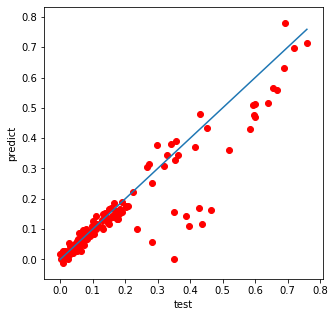

In [19]:
Y_pred=model.predict(X_test)
plt.figure(figsize=(5,5))
plt.scatter(Y_test,Y_pred,c='r')
plt.plot([min(Y_test),max(Y_test)],[min(Y_test),max(Y_test)])
plt.xlabel('test')
plt.ylabel('predict')
plt.show()